In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

2023-04-25 17:00:52.965800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 17:00:53.405623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-25 17:00:53.405668: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-25 17:00:54.570386: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


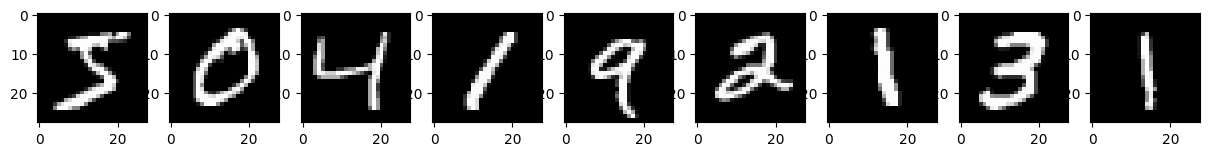

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
X_tr,y_tr = train_data
X_test,y_test = test_data
print(f'{X_tr.shape}')
print(f'{y_tr.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')
fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
  ax.imshow(X_tr[index],cmap='gray')
plt.show()

In [3]:
CATEGORIES = 10
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0
# Prevod matic 28*28 na vektory
X_tr_vec = X_tr.reshape(-1,28*28)
X_test_vec = X_test.reshape(-1,28*28)
print(X_tr_vec.shape)
print(X_test_vec.shape)

(60000, 784)
(10000, 784)


In [4]:
print(X_tr_vec[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [5]:
# log_regrese_model = LogisticRegression(C=1, penalty="l2", solver="saga")
log_regrese_model = LogisticRegression(C=1, penalty="l2", solver="liblinear")
log_regrese_model.fit(X_tr_vec, y_tr)

LogisticRegression(C=1, solver='liblinear')

0.9201
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



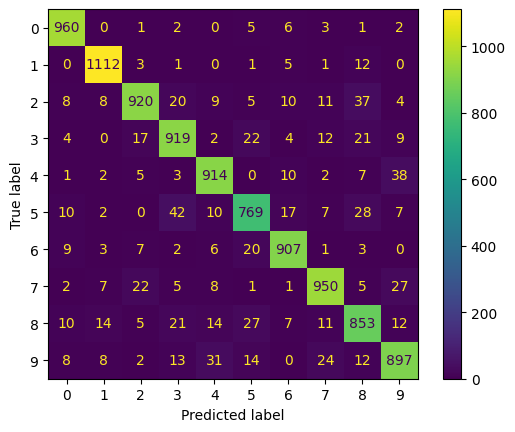

In [6]:
y_hat = log_regrese_model.predict(X_test_vec)

cm_log = confusion_matrix(y_test, y_hat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels= [i for i in range(10)])
disp.plot()

print(log_regrese_model.score(X_test_vec, y_test))
print(classification_report(y_test, y_hat))

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_tr_vec, y_tr)

KNeighborsClassifier(n_neighbors=3)

0.9705
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



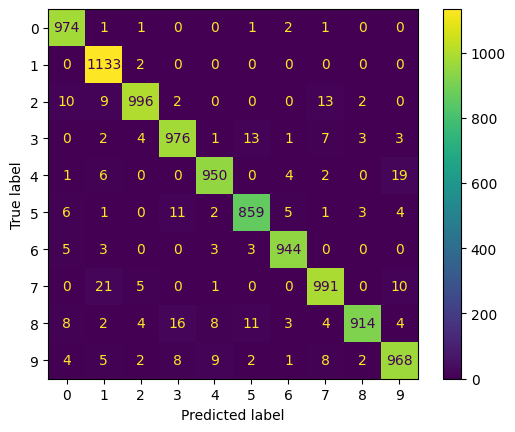

In [8]:
y_hat = knn_model.predict(X_test_vec)

cm_knn = confusion_matrix(y_test, y_hat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels= [i for i in range(10)])
disp.plot()

print(knn_model.score(X_test_vec, y_test))
print(classification_report(y_test, y_hat))

In [9]:
forest_model = RandomForestClassifier(max_depth=None, n_estimators=300, random_state=0)
forest_model.fit(X_tr_vec, y_tr)

RandomForestClassifier(n_estimators=300, random_state=0)

0.9702
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



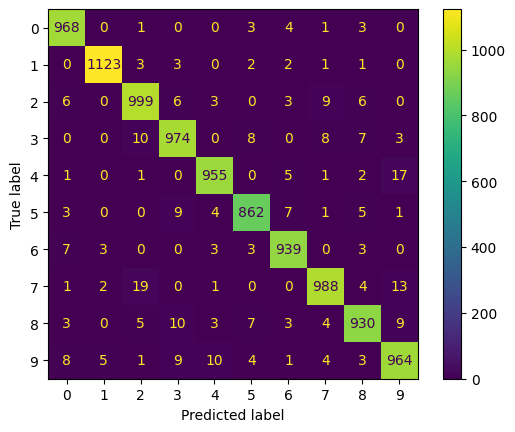

In [10]:
y_hat = forest_model.predict(X_test_vec)

cm_forest = confusion_matrix(y_test, y_hat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels= [i for i in range(10)])
disp.plot()

print(forest_model.score(X_test_vec, y_test))
print(classification_report(y_test, y_hat))